<a href="https://colab.research.google.com/github/fawazdhianabil/Sentiment-Analyst-Suplement/blob/main/Pembobotan_Kata_TF_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Library**

In [58]:
#Impor Modul Yang Diperlukan
import pandas as pd
import numpy as np
import math
import re
from nltk import word_tokenize
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#**Import Dataset**

In [59]:
#df_teks=pd.DataFrame({"text":['mudah cs respons cepat diskon',
#                              'tidak sesuai berangkat tidak', 
#                              'aplikasi redbus bantu mudah pesan tiket jadwal berangkat sesuai operator bus',
#                              'aplikasi tidak buka',
#                              'bagus alam kait dobel bayar hubung cs tidak uang mantap',
#                              'tidak lengkap bus jalur selatan jalur pantura pilih',
#                              'bantu aplikasi',
#                              'redbus mantap berangkat selamat mataram lombok tuju terminal kalideres']})
#df_teks

In [60]:
df = pd.read_csv('Hasil Akhir Ajaib.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Text_Clean,Case_Folding,Lemmatisasi,Stem,Stopwrod,Stopword,Unwanted,Text_Clean_Split,polarity_score,polarity
0,3fb74323-4a84-4c0e-80d7-ab0eae7b375d,dareldime lo,https://play-lh.googleusercontent.com/a-/ACNPE...,Kenapa navigasi ajaib malah dibikin ribet ? Ga...,2,20,2.0.1,2022-09-14 01:25:37,"Hi kak, terimakasih atas feedback yang diberik...",2022-07-19 01:31:56,Kenapa navigasi malah dibikin ribet Ga bisa la...,kenapa navigasi ajaib malah dibikin ribet ga b...,kenapa navigasi ajaib malah bikin ribet ga bis...,kenapa navigasi ajaib malah bikin ribet ga bis...,navigasi ajaib bikin ribet ga klik portofolio ...,navigasi ajaib bikin ribet ga klik portofolio ...,navigasi bikin ribet ga klik portofolio trade ...,"['navigasi', 'ajaib', 'bikin', 'ribet', 'ga', ...",2,positive
1,2db372fe-e106-49e0-aca2-e5904b88f3cc,Sumi Tabayo,https://play-lh.googleusercontent.com/a-/ACNPE...,Aplikasi yg sangat membantu dlm setiap proses ...,5,9,2.0.1,2022-09-16 11:30:39,NaN,NaN,Aplikasi yg sangat membantu dlm setiap proses ...,aplikasi yg sangat membantu dlm setiap proses ...,aplikasi yg sangat bantu dlm tiap proses inves...,aplikasi yg sangat bantu dlm tiap proses inves...,aplikasi bantu dlm proses investasi mudah aman...,aplikasi bantu dlm proses investasi mudah aman...,bantu dlm proses investasi mudah aman bgt coco...,"['aplikasi', 'bantu', 'dlm', 'proses', 'invest...",4,positive
2,87affa47-54db-4435-a082-5b5842dd1e0b,Alexcisco Silitonga,https://play-lh.googleusercontent.com/a/ALm5wu...,Saran saya jgn pikir2 dlu klo mau pake app aja...,2,255,1.0.7,2022-07-01 02:25:39,"Hi kak Alexcisco, mohon maaf atas ketidaknyama...",2022-07-01 03:04:09,Saran saya jgn pikir2 dlu klo mau pake app aja...,saran saya jgn dlu klo mau pake app ajaib klo ...,saran saya jgn dlu klo mau pake app ajaib klo ...,saran saya jgn dlu klo mau pake app ajaib klo ...,saran jgn dlu klo pake app ajaib klo error tan...,saran jgn dlu klo pake app ajaib klo error tan...,saran jgn dlu klo pake app klo error tangan tg...,"['saran', 'jgn', 'dlu', 'klo', 'pake', 'app', ...",-37,negative
3,7550fac8-60fe-4049-a282-9374cea3e3db,Ilham Pratamaa,https://play-lh.googleusercontent.com/a-/ACNPE...,"Kurang suka dengan apk ini, terlalu ribet dala...",1,101,1.1.0,2022-08-11 03:33:24,"Hi, Kak Ilham. Mohon maaf atas ketidaknyamanan...",2022-08-08 06:45:57,Kurang suka dengan apk ini terlalu ribet dalam...,kurang suka dengan apk ini terlalu ribet dalam...,kurang suka dengan apk ini terlalu ribet dalam...,kurang suka dengan apk ini terlalu ribet dalam...,suka apk ribet urus transaksi tarik pending te...,suka apk ribet urus transaksi tarik pending te...,suka apk ribet urus transaksi tarik pending te...,"['suka', 'apk', 'ribet', 'urus', 'transaksi', ...",-12,negative
4,27b93342-683f-46db-a76f-9ad2742ecab3,dedy gunawan,https://play-lh.googleusercontent.com/a-/ACNPE...,"User friendly interface nya, byy nya juga term...",1,74,1.1.0,2022-08-10 02:25:01,"Halo, terima kasih atas masukannya, akan kami ...",2021-12-07 06:13:44,User friendly interface nya byy nya juga terma...,user friendly interface nya byy nya juga terma...,user friendly interface nya byy nya juga masuk...,user friendly interface nya byy nya juga masuk...,user friendly interface byy masuk error tolong...,user friendly interface byy masuk error tolong...,user friendly interface byy masuk error tolong...,"['user', 'friendly', 'interface', 'byy', 'masu...",-10,negative


#**Hapus Tanda Baca**

In [61]:
import re

In [64]:
def satu(teks):
  # Menghapus Tanda Baca
  text = re.sub(r"[^\w]|_"," ", teks)
  return text

In [65]:
df['Text'] = df.Text_Clean_Split.apply(satu)
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,...,Case_Folding,Lemmatisasi,Stem,Stopwrod,Stopword,Unwanted,Text_Clean_Split,polarity_score,polarity,Text
0,3fb74323-4a84-4c0e-80d7-ab0eae7b375d,dareldime lo,https://play-lh.googleusercontent.com/a-/ACNPE...,Kenapa navigasi ajaib malah dibikin ribet ? Ga...,2,20,2.0.1,2022-09-14 01:25:37,"Hi kak, terimakasih atas feedback yang diberik...",2022-07-19 01:31:56,...,kenapa navigasi ajaib malah dibikin ribet ga b...,kenapa navigasi ajaib malah bikin ribet ga bis...,kenapa navigasi ajaib malah bikin ribet ga bis...,navigasi ajaib bikin ribet ga klik portofolio ...,navigasi ajaib bikin ribet ga klik portofolio ...,navigasi bikin ribet ga klik portofolio trade ...,"['navigasi', 'ajaib', 'bikin', 'ribet', 'ga', ...",2,positive,navigasi ajaib bikin ribet ga ...
1,2db372fe-e106-49e0-aca2-e5904b88f3cc,Sumi Tabayo,https://play-lh.googleusercontent.com/a-/ACNPE...,Aplikasi yg sangat membantu dlm setiap proses ...,5,9,2.0.1,2022-09-16 11:30:39,NaN,NaN,...,aplikasi yg sangat membantu dlm setiap proses ...,aplikasi yg sangat bantu dlm tiap proses inves...,aplikasi yg sangat bantu dlm tiap proses inves...,aplikasi bantu dlm proses investasi mudah aman...,aplikasi bantu dlm proses investasi mudah aman...,bantu dlm proses investasi mudah aman bgt coco...,"['aplikasi', 'bantu', 'dlm', 'proses', 'invest...",4,positive,aplikasi bantu dlm proses invest...
2,87affa47-54db-4435-a082-5b5842dd1e0b,Alexcisco Silitonga,https://play-lh.googleusercontent.com/a/ALm5wu...,Saran saya jgn pikir2 dlu klo mau pake app aja...,2,255,1.0.7,2022-07-01 02:25:39,"Hi kak Alexcisco, mohon maaf atas ketidaknyama...",2022-07-01 03:04:09,...,saran saya jgn dlu klo mau pake app ajaib klo ...,saran saya jgn dlu klo mau pake app ajaib klo ...,saran saya jgn dlu klo mau pake app ajaib klo ...,saran jgn dlu klo pake app ajaib klo error tan...,saran jgn dlu klo pake app ajaib klo error tan...,saran jgn dlu klo pake app klo error tangan tg...,"['saran', 'jgn', 'dlu', 'klo', 'pake', 'app', ...",-37,negative,saran jgn dlu klo pake app ...
3,7550fac8-60fe-4049-a282-9374cea3e3db,Ilham Pratamaa,https://play-lh.googleusercontent.com/a-/ACNPE...,"Kurang suka dengan apk ini, terlalu ribet dala...",1,101,1.1.0,2022-08-11 03:33:24,"Hi, Kak Ilham. Mohon maaf atas ketidaknyamanan...",2022-08-08 06:45:57,...,kurang suka dengan apk ini terlalu ribet dalam...,kurang suka dengan apk ini terlalu ribet dalam...,kurang suka dengan apk ini terlalu ribet dalam...,suka apk ribet urus transaksi tarik pending te...,suka apk ribet urus transaksi tarik pending te...,suka apk ribet urus transaksi tarik pending te...,"['suka', 'apk', 'ribet', 'urus', 'transaksi', ...",-12,negative,suka apk ribet urus transaksi ...
4,27b93342-683f-46db-a76f-9ad2742ecab3,dedy gunawan,https://play-lh.googleusercontent.com/a-/ACNPE...,"User friendly interface nya, byy nya juga term...",1,74,1.1.0,2022-08-10 02:25:01,"Halo, terima kasih atas masukannya, akan kami ...",2021-12-07 06:13:44,...,user friendly interface nya byy nya juga terma...,user friendly interface nya byy nya juga masuk...,user friendly interface nya byy nya juga masuk...,user friendly interface byy masuk error tolong...,user friendly interface byy masuk error tolong...,user friendly interface byy masuk error tolong...,"['user', 'friendly', 'interface', 'byy', 'masu...",-10,negative,user friendly interface byy masu...


In [67]:
df[df['Text'].str.isspace()==True].index

Int64Index([ 4366,  6891, 10401, 12041, 12078, 12626, 14885, 18432, 18475,
            19706, 19721, 19732, 19738, 19740],
           dtype='int64')

In [69]:
df = df.drop(df.index[[ 4366,  6891, 10401, 12041, 12078, 12626, 14885, 18432, 18475,
            19706, 19721, 19732, 19738, 19740]])
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,...,Case_Folding,Lemmatisasi,Stem,Stopwrod,Stopword,Unwanted,Text_Clean_Split,polarity_score,polarity,Text
0,3fb74323-4a84-4c0e-80d7-ab0eae7b375d,dareldime lo,https://play-lh.googleusercontent.com/a-/ACNPE...,Kenapa navigasi ajaib malah dibikin ribet ? Ga...,2,20,2.0.1,2022-09-14 01:25:37,"Hi kak, terimakasih atas feedback yang diberik...",2022-07-19 01:31:56,...,kenapa navigasi ajaib malah dibikin ribet ga b...,kenapa navigasi ajaib malah bikin ribet ga bis...,kenapa navigasi ajaib malah bikin ribet ga bis...,navigasi ajaib bikin ribet ga klik portofolio ...,navigasi ajaib bikin ribet ga klik portofolio ...,navigasi bikin ribet ga klik portofolio trade ...,"['navigasi', 'ajaib', 'bikin', 'ribet', 'ga', ...",2,positive,navigasi ajaib bikin ribet ga ...
1,2db372fe-e106-49e0-aca2-e5904b88f3cc,Sumi Tabayo,https://play-lh.googleusercontent.com/a-/ACNPE...,Aplikasi yg sangat membantu dlm setiap proses ...,5,9,2.0.1,2022-09-16 11:30:39,NaN,NaN,...,aplikasi yg sangat membantu dlm setiap proses ...,aplikasi yg sangat bantu dlm tiap proses inves...,aplikasi yg sangat bantu dlm tiap proses inves...,aplikasi bantu dlm proses investasi mudah aman...,aplikasi bantu dlm proses investasi mudah aman...,bantu dlm proses investasi mudah aman bgt coco...,"['aplikasi', 'bantu', 'dlm', 'proses', 'invest...",4,positive,aplikasi bantu dlm proses invest...
2,87affa47-54db-4435-a082-5b5842dd1e0b,Alexcisco Silitonga,https://play-lh.googleusercontent.com/a/ALm5wu...,Saran saya jgn pikir2 dlu klo mau pake app aja...,2,255,1.0.7,2022-07-01 02:25:39,"Hi kak Alexcisco, mohon maaf atas ketidaknyama...",2022-07-01 03:04:09,...,saran saya jgn dlu klo mau pake app ajaib klo ...,saran saya jgn dlu klo mau pake app ajaib klo ...,saran saya jgn dlu klo mau pake app ajaib klo ...,saran jgn dlu klo pake app ajaib klo error tan...,saran jgn dlu klo pake app ajaib klo error tan...,saran jgn dlu klo pake app klo error tangan tg...,"['saran', 'jgn', 'dlu', 'klo', 'pake', 'app', ...",-37,negative,saran jgn dlu klo pake app ...
3,7550fac8-60fe-4049-a282-9374cea3e3db,Ilham Pratamaa,https://play-lh.googleusercontent.com/a-/ACNPE...,"Kurang suka dengan apk ini, terlalu ribet dala...",1,101,1.1.0,2022-08-11 03:33:24,"Hi, Kak Ilham. Mohon maaf atas ketidaknyamanan...",2022-08-08 06:45:57,...,kurang suka dengan apk ini terlalu ribet dalam...,kurang suka dengan apk ini terlalu ribet dalam...,kurang suka dengan apk ini terlalu ribet dalam...,suka apk ribet urus transaksi tarik pending te...,suka apk ribet urus transaksi tarik pending te...,suka apk ribet urus transaksi tarik pending te...,"['suka', 'apk', 'ribet', 'urus', 'transaksi', ...",-12,negative,suka apk ribet urus transaksi ...
4,27b93342-683f-46db-a76f-9ad2742ecab3,dedy gunawan,https://play-lh.googleusercontent.com/a-/ACNPE...,"User friendly interface nya, byy nya juga term...",1,74,1.1.0,2022-08-10 02:25:01,"Halo, terima kasih atas masukannya, akan kami ...",2021-12-07 06:13:44,...,user friendly interface nya byy nya juga terma...,user friendly interface nya byy nya juga masuk...,user friendly interface nya byy nya juga masuk...,user friendly interface byy masuk error tolong...,user friendly interface byy masuk error tolong...,user friendly interface byy masuk error tolong...,"['user', 'friendly', 'interface', 'byy', 'masu...",-10,negative,user friendly interface byy masu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3870ede0-65e2-4265-9d8b-edd120c4ef5f,Puspita Febriani,https://play-lh.googleusercontent.com/a/ALm5wu...,"Bintang 4 dl y, masih nyoba buat investasi disini",4,0,1.0.0K,2020-10-01 12:30:16,"Halo Puspita, terima kasih sudah pakai Ajaib! ...",2020-10-02 11:46:47,...,bintang dl y masih nyoba buat investasi disini,bintang dl y masih nyoba buat investasi sini,bintang dl y masih nyoba buat investasi sini,bintang dl y nyoba investasi,bintang dl nyoba investasi,bin

#**TF RF**

In [70]:
#Impor Modul Yang Diperlukan
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
import math
from sklearn.preprocessing import normalize

def TF_RF(df_teks):
    # Membuat list kosa kata dari seluruh teks input
    kosa_kata = set()
    for i in df_teks:
        token_kal=set(word_tokenize(i.lower()))
        kosa_kata=set.union(kosa_kata,token_kal)
    kosa_kata = sorted(kosa_kata)
    # Membuat dictionary kata-kata
    indeks_kata = {}
    for kata in kosa_kata:
        indeks_kata[kata] = 0
    # Jumlah kosa kata(untuk kolom)
    jumlah_kosa_kata = len(kosa_kata)
    # Membangun matriks kata TF
    vektor_TF=np.array([])
    for baris_teks in df_teks:
        baris_kata = indeks_kata.copy()
        split_baris = baris_teks.lower().split()
        for kata in baris_teks.lower().split():
            baris_kata[kata]=+1
        baris_kata = np.array(list(baris_kata.values()))
        baris_kata = baris_kata/len(split_baris)
        vektor_TF = np.concatenate((vektor_TF,baris_kata), axis=0)
    matriks_TF = vektor_TF.reshape(df_teks.shape[0], jumlah_kosa_kata)
    # Membagun dataframe kata TF
    df_TF = pd.DataFrame(matriks_TF, columns=kosa_kata, index=df_teks.tolist())
    # Menghitung baris RF
    baris_RF=[]
    for kolom in df_TF.columns :
        b = len(df_TF[df_TF[kolom]>0])
        c = len(df_TF)-b
        baris_rf = (math.log10(2+(b/c)))  
        baris_RF.append(baris_rf)
    # Membuat matriks TF-RF
    vektor_TFRF=np.array([])
    for baris in matriks_TF:
        baris_tfrf=np.multiply(baris,baris_RF)
        vektor_TFRF=np.concatenate((vektor_TFRF,baris_tfrf), axis=0)
    matriks_TFRF = vektor_TFRF.reshape(df_teks.shape[0], jumlah_kosa_kata)
    # Membuat dataframe TF-RF
    df_TF_RF = pd.DataFrame(matriks_TFRF, columns=kosa_kata, index=df_teks.tolist())
    return df_TF

In [87]:
df_TF_RF=(TF_RF(df['Text'][:3000]))
df_TF_RF

,aaaaaa,aamiin,abai,abal,abis,abiz,acak,acc,accept,accont,...,yu,yuk,yunipbkh,yuuk,yy,zaman,zillenial,zimbabwe,zoom,zulfvxkm
navigasi ajaib bikin ribet ga klik portofolio trade list transaksi history ajaib sekuritas tampil mudah navigasi hilang aneh bin ajaib,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aplikasi bantu dlm proses investasi mudah aman bgt cocok utk dlm laku investasi aman nyaman gak ragu utk transaksi laku jamin aman nyaman transaksi pakai aplikasi ajaib,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
saran jgn dlu klo pake app ajaib klo error tangan tgl juli aplikasi error tdk tampil hrg menit trus order book jg error update jg ga jd lbh ribet tdk sperti tampil ajaib muncul gampang ngeselin aplikasi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
suka apk ribet urus transaksi tarik pending tempo akibat modal tahan gilir beli aset cepat gilir tarik beda apk belah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user friendly interface byy masuk error tolong rugi pindah tampil bagus byy fee murah tak banding dg rugi hasil transaksi buy hilang sell hilang uang stabil rubah nilai pagi rugi bikin transaksi jd bintang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bantu ajar investasi mudah terimakasih,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aplikasi keren gampang paham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sy blm begituh paham tp ok,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
app investasi percaya jamin aman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
df_TF_RF.isnull().any().any()

False

##**Eksport Data TF RF**

In [89]:
#df_TF_RF.to_csv('TF RF.csv',index=True)
#df_TF_RF.to_excel('TF RF.xlsx',index=True)

#**Train Test Split**

In [90]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()

In [92]:
x = df_TF_RF
y = le.fit_transform(df['polarity'][:3000])

In [93]:
len(x)

3000

In [94]:
len(y)

3000

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x.values,y,test_size=0.2,random_state=1234)

#**Modelling**

##**Multinomial Naive Bayes**

In [96]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
mnb = MultinomialNB().fit(x_train,y_train)
y_pred_mnb = mnb.predict(x_test)
y_pred_mnb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [97]:
from sklearn.metrics import classification_report,confusion_matrix
cm_mnb = confusion_matrix(y_pred_mnb,y_test)
print(cm_mnb)
print(classification_report(y_pred_mnb,y_test))

[[382  37 181]
 [  0   0   0]
 [  0   0   0]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78       600
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.64       600
   macro avg       0.33      0.21      0.26       600
weighted avg       1.00      0.64      0.78       600



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###**Confusion Matrix**

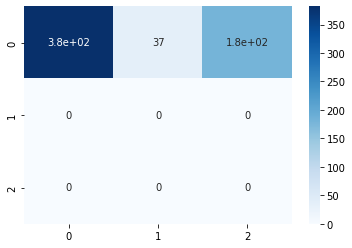

In [99]:
import seaborn as sns
sns.heatmap(cm_mnb,annot=True,cmap='Blues')

###**K-Fold**

In [101]:
from sklearn.model_selection import cross_val_score

score1 = cross_val_score(mnb, x_train, y_train, cv=10, scoring='accuracy')
score2 = cross_val_score(mnb, x_train, y_train, cv=10, scoring='precision_weighted')
score3 = cross_val_score(mnb, x_train, y_train, cv=10, scoring='recall_weighted')
score4 = cross_val_score(mnb, x_train, y_train, cv=10, scoring='f1_weighted')

print('K-Fold Akurasi: %s' % score1.mean())
print('K-Fold Precision: %s' % score2.mean())
print('K-Fold Recall: %s' % score3.mean())
print('K-Fold f-measure: %s' % score4.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

K-Fold Akurasi: 0.6245833333333334
K-Fold Precision: 0.44981125784518816
K-Fold Recall: 0.6245833333333334
K-Fold f-measure: 0.48110958212865984


##**Gaussian Naive Bayes**

In [102]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
y_pred_nb

array([1, 2, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0,
       1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 0,
       2, 1, 0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 2, 1,
       2, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 2,
       0, 0, 2, 0, 2, 0, 2, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1,
       0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 0,
       1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2,
       2, 2, 0, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 1, 0, 2,
       2, 1, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2,
       0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 1,
       0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1,
       1, 0, 1, 0, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1,

In [103]:
from sklearn.metrics import classification_report, confusion_matrix
cm_nb = confusion_matrix(y_pred_nb,y_test)
print(cm_nb)
print(classification_report(y_pred_nb,y_test))

[[163   8  58]
 [113  13  47]
 [106  16  76]]
              precision    recall  f1-score   support

           0       0.43      0.71      0.53       229
           1       0.35      0.08      0.12       173
           2       0.42      0.38      0.40       198

    accuracy                           0.42       600
   macro avg       0.40      0.39      0.35       600
weighted avg       0.40      0.42      0.37       600



###**Confusion Matrix**

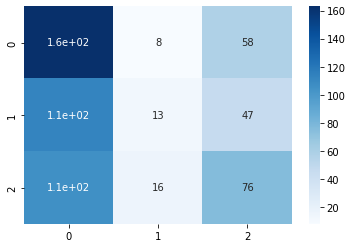

In [104]:
import seaborn as sns
sns.heatmap(cm_nb,annot=True,cmap='Blues')

###**K-Fold**

In [106]:
from sklearn.model_selection import cross_val_score

score1 = cross_val_score(nb, x_train, y_train, cv=10, scoring='accuracy')
score2 = cross_val_score(nb, x_train, y_train, cv=10, scoring='precision_weighted')
score3 = cross_val_score(nb, x_train, y_train, cv=10, scoring='recall_weighted')
score4 = cross_val_score(nb, x_train, y_train, cv=10, scoring='f1_weighted')

print('K-Fold Akurasi: %s' % score1.mean())
print('K-Fold Precision: %s' % score2.mean())
print('K-Fold Recall: %s' % score3.mean())
print('K-Fold f-measure: %s' % score4.mean())

K-Fold Akurasi: 0.3975
K-Fold Precision: 0.563905195459393
K-Fold Recall: 0.3975
K-Fold f-measure: 0.441824765782877


#**Referensi**

https://github.com/fawazdhianabil/PSDS_KelasMahir_PejuangData3.0/blob/main/1800015042_Text_Representation.ipynb